2024-10-26 11:51:16.620952: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
100%|██████████| 660/660 [00:01<00:00, 568.71it/s]
2024-10-26 11:51:26.424175: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-26 11:51:26.444951: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux

Epoch 1/2


2024-10-26 11:51:29.632843: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-10-26 11:51:31.617616: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.59GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-26 11:51:31.617655: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.59GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-26 11:51:32.067699: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.38GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if m

63/63 [==============================] - 59s 688ms/step - loss: -1.2097 - dice_metric: 0.4089 - val_loss: -2.3689 - val_dice_metric: 0.4233 - lr: 1.0000e-04
Epoch 2/2
17/17 [==============================] - 16s 655ms/step
[0.0000000e+00 1.1756701e-38 1.1757149e-38 ... 9.9999976e-01 9.9999988e-01
 1.0000000e+00]


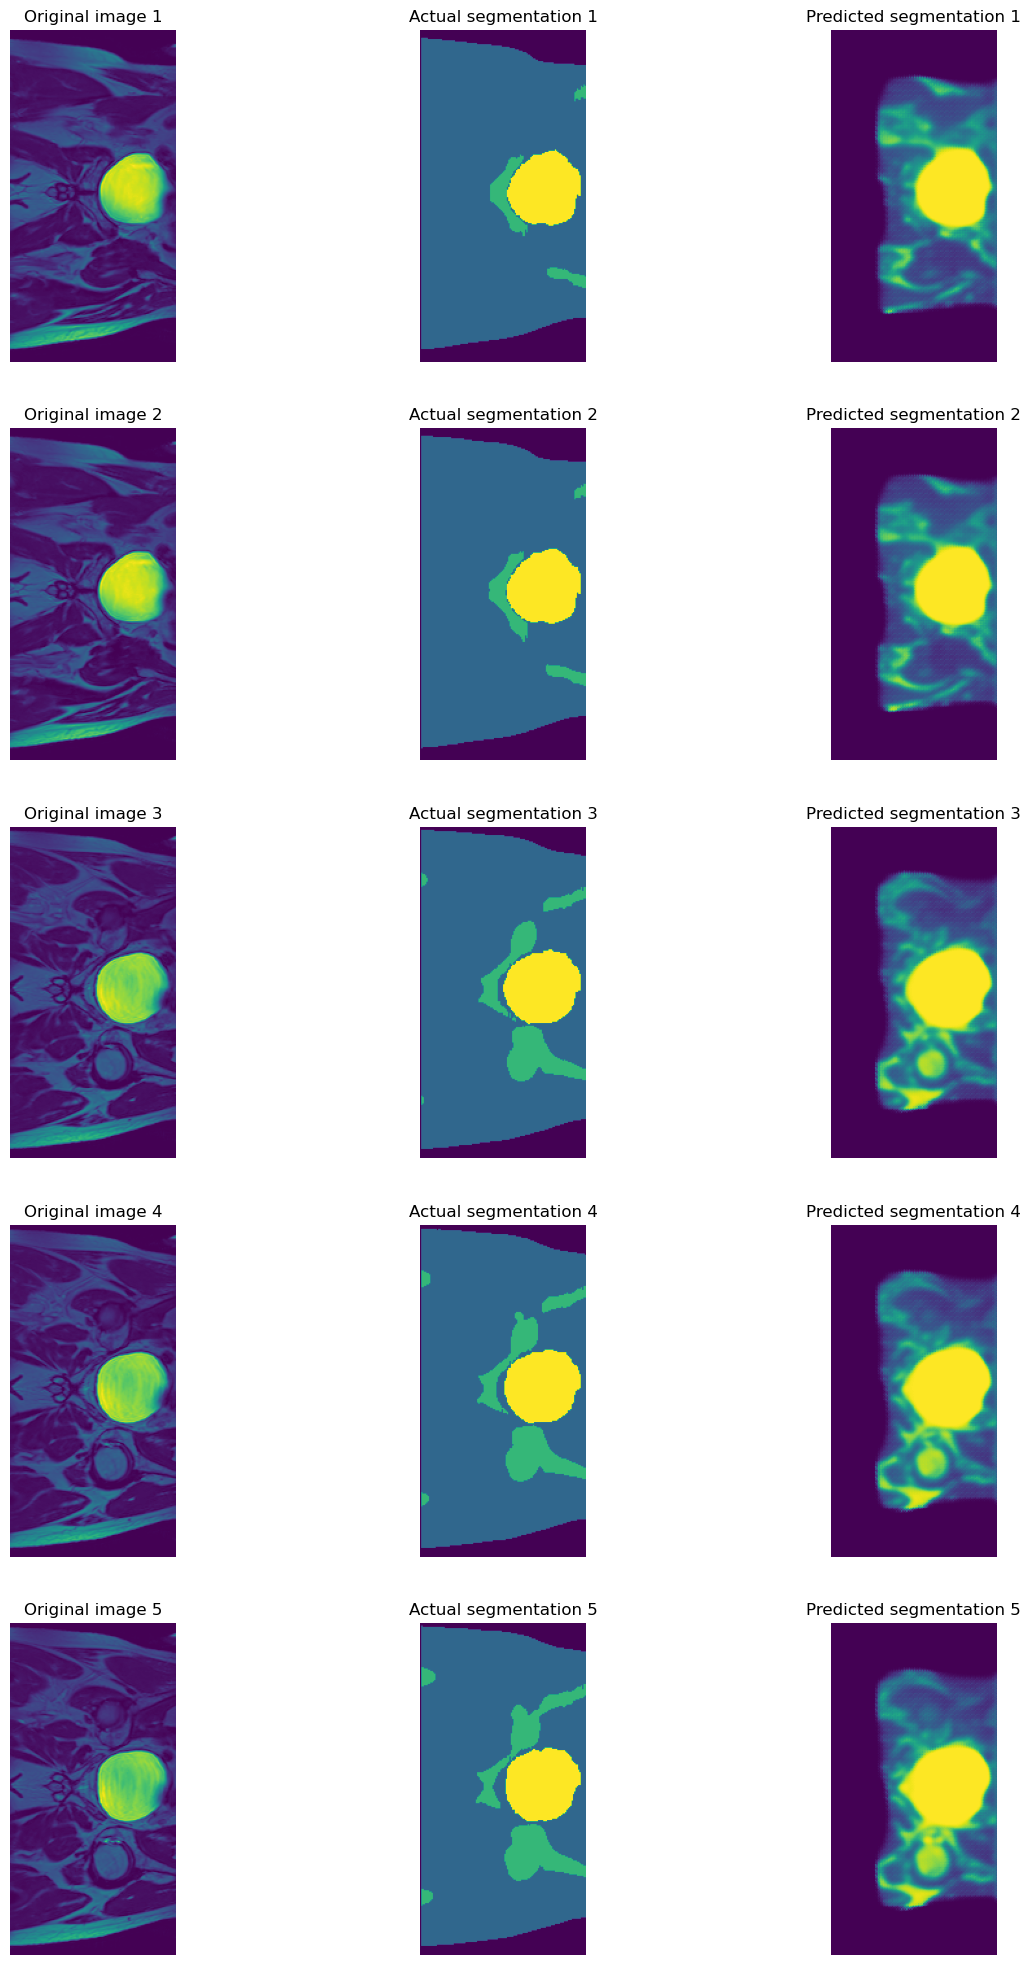

In [1]:
import train
import matplotlib.pyplot as plt
from train import unetModel, dice_metric, trainResults
from dataset import testImages, testSegImages
import numpy as np  

testPredictedSeg = unetModel.predict(testImages)
print(np.unique(testPredictedSeg)) 

fig, pos = plt.subplots(5, 3, figsize=(15, 25))
for i in range(5):
    # Display original image
    pos[i, 0].imshow(testImages[i].squeeze())
    pos[i, 0].set_title(f'Original image {i+1}')
    pos[i, 0].axis('off')

    # Display actual segmentation 
    pos[i, 1].imshow(testSegImages[i].squeeze())
    pos[i, 1].set_title(f'Actual segmentation {i+1}')
    pos[i, 1].axis('off')

    # Display predicted segmentation 
    pos[i, 2].imshow(testPredictedSeg[i].squeeze())
    pos[i, 2].set_title(f'Predicted segmentation {i+1}')
    pos[i, 2].axis('off')


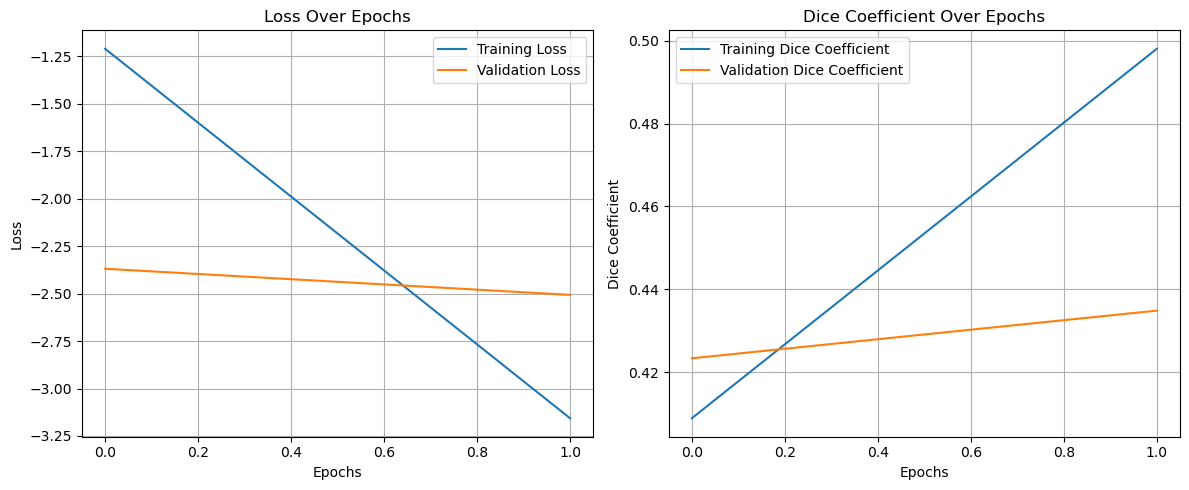

In [2]:
import matplotlib.pyplot as plt




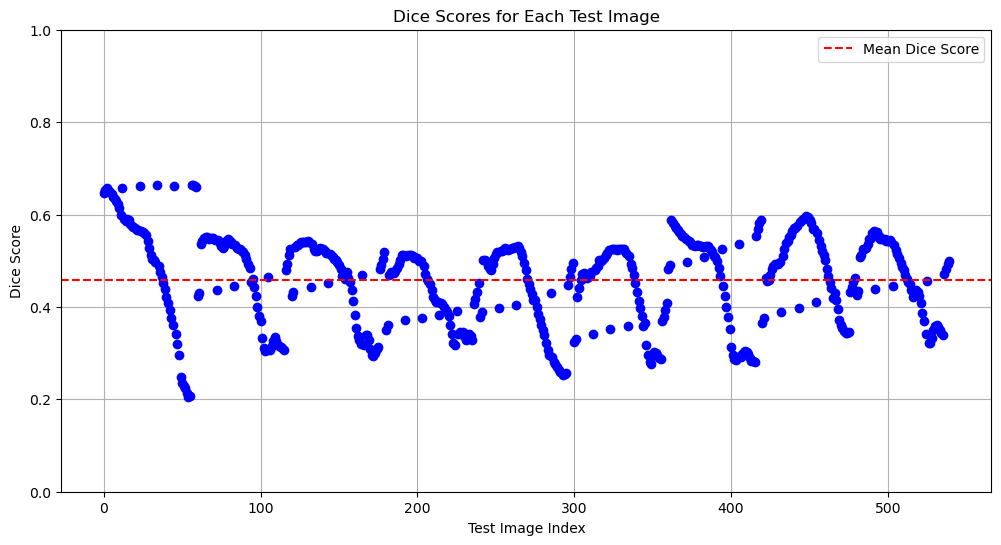

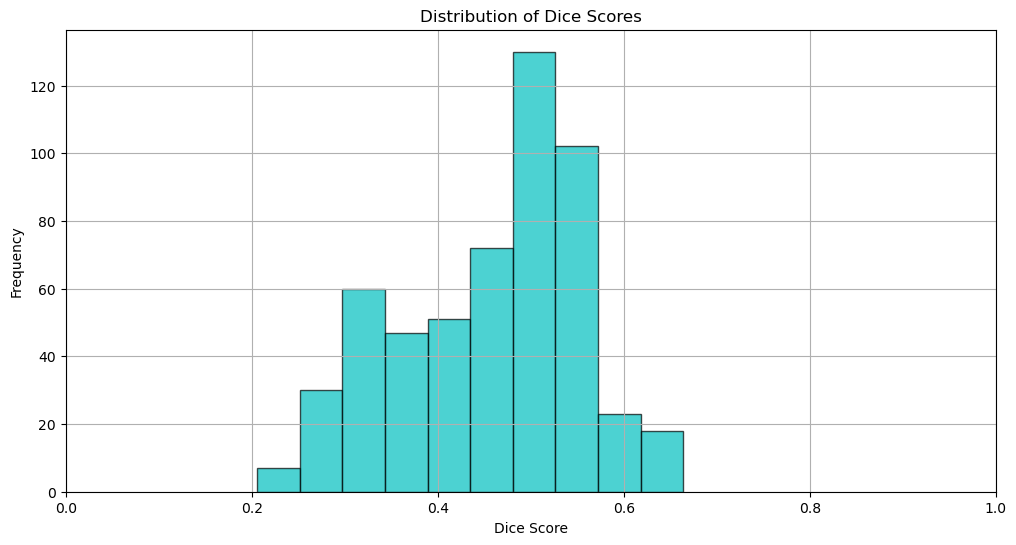

In [3]:
import matplotlib.pyplot as plt
def calculate_dice_scores(y_true, y_pred):
    dice_scores = []
    for i in range(len(y_true)):
        y_pred_squeezed = np.squeeze(y_pred[i])  
        score = dice_metric(y_pred_squeezed, y_true[i]).numpy()  
        dice_scores.append(score)
    return dice_scores

dice_scores = calculate_dice_scores(testSegImages, testPredictedSeg)
dice_scores = np.array(dice_scores)

plt.figure(figsize=(12, 6))
plt.plot(dice_scores, marker='o', linestyle='None', color='b')
plt.title('Dice Scores for Each Test Image')
plt.xlabel('Test Image Index')
plt.ylabel('Dice Score')
plt.ylim(0, 1) 
plt.grid()
plt.axhline(y=np.mean(dice_scores), color='r', linestyle='--', label='Mean Dice Score')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(dice_scores, bins=10, color='c', edgecolor='black', alpha=0.7)
plt.title('Distribution of Dice Scores')
plt.xlabel('Dice Score')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Dice scores range from 0 to 1
plt.grid()
plt.show()
